# 🌡️ Prediksi Suhu Mulut dari Data Infrared

Dataset: Infrared.csv (berisi fitur suhu wajah dan kondisi lingkungan)

## 🎯 Tujuan
Memprediksi suhu oral (`aveOralM`) dari fitur suhu wajah menggunakan:
- **Bagging**: Random Forest
- **Boosting**: Gradient Boosting

## 🧮 Rumus Evaluasi
- **MSE** = $ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
- **RMSE** = $ \sqrt{MSE} $
- **R²** = $ 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $

## 📊 Hasil Evaluasi

| Model                          | MSE     | RMSE    | R² Score |
|-------------------------------|---------|---------|----------|
| Random Forest (Bagging)       | 0.0661  | 0.2571  | 0.6676   |
| Gradient Boosting (Boosting)  | 0.0622  | 0.2495  | 0.6872   |

## ✅ Kesimpulan
Model **Gradient Boosting Regressor** menunjukkan performa terbaik karena:
- Memiliki **MSE dan RMSE yang lebih rendah** dibandingkan Random Forest → prediksi lebih akurat
- Memiliki **R² lebih tinggi (0.6872)** → lebih baik dalam menjelaskan variasi suhu mulut pada data

> Dengan demikian, **Gradient Boosting** adalah model regresi terbaik untuk dataset ini.


=== 📊 Hasil Evaluasi Model Regressi Suhu Mulut ===

🔹 Random Forest Regressor (Bagging)
---------------------------------------------
Mean Squared Error (MSE)  : 0.066114
Root Mean Squared Error   : 0.257126
Koefisien Determinasi R²  : 0.6676

🔸 Gradient Boosting Regressor (Boosting)
----------------------------------------------
Mean Squared Error (MSE)  : 0.062229
Root Mean Squared Error   : 0.249457
Koefisien Determinasi R²  : 0.6872

✅ Kesimpulan:
Model Gradient Boosting menunjukkan performa terbaik:
- MSE dan RMSE lebih rendah → prediksi lebih akurat
- R² lebih tinggi (0.6872) → mampu menjelaskan lebih banyak variasi suhu mulut

👉 Maka, **Gradient Boosting Regressor** adalah model terbaik untuk dataset infrared ini.


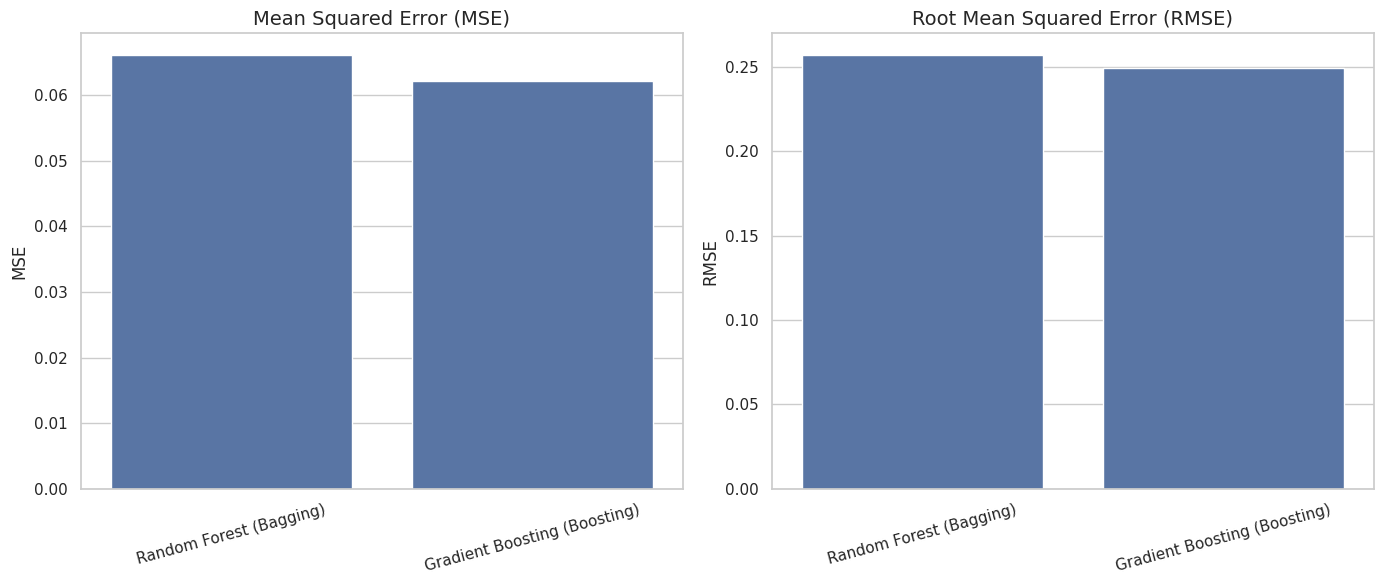

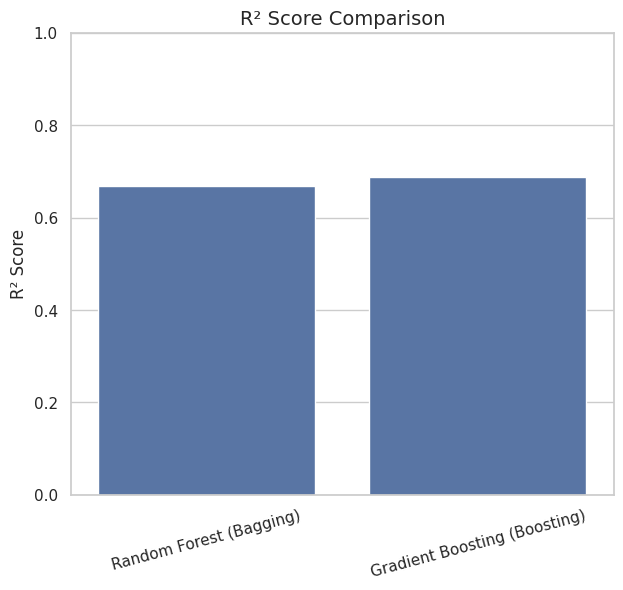

In [2]:
# ==========================================
# 🌡️ Prediksi Suhu Mulut dari Citra Infrared
# ==========================================

# 1. Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 2. Load Dataset Infrared
df = pd.read_csv('Infrared.csv')

# 3. Preprocessing
df.dropna(inplace=True)  # Hapus data kosong

# Encode fitur kategorikal
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# 4. Fitur dan Target
X = df.drop(columns=['aveOralM'])  # Target: suhu mulut
y = df['aveOralM']

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Inisialisasi dan Training Model
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# 7. Prediksi
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)

# 8. Evaluasi Model
def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

rf_mse, rf_rmse, rf_r2 = regression_metrics(y_test, rf_pred)
gb_mse, gb_rmse, gb_r2 = regression_metrics(y_test, gb_pred)

# 9. Hasil Evaluasi
print("=== 📊 Hasil Evaluasi Model Regressi Suhu Mulut ===\n")

print("🔹 Random Forest Regressor (Bagging)")
print("-" * 45)
print(f"Mean Squared Error (MSE)  : {rf_mse:.6f}")
print(f"Root Mean Squared Error   : {rf_rmse:.6f}")
print(f"Koefisien Determinasi R²  : {rf_r2:.4f}\n")

print("🔸 Gradient Boosting Regressor (Boosting)")
print("-" * 46)
print(f"Mean Squared Error (MSE)  : {gb_mse:.6f}")
print(f"Root Mean Squared Error   : {gb_rmse:.6f}")
print(f"Koefisien Determinasi R²  : {gb_r2:.4f}\n")

print("✅ Kesimpulan:")
print("Model Gradient Boosting menunjukkan performa terbaik:")
print("- MSE dan RMSE lebih rendah → prediksi lebih akurat")
print(f"- R² lebih tinggi ({gb_r2:.4f}) → mampu menjelaskan lebih banyak variasi suhu mulut")
print("\n👉 Maka, **Gradient Boosting Regressor** adalah model terbaik untuk dataset infrared ini.")

# 10. Visualisasi Hasil Evaluasi
metrics_df = pd.DataFrame({
    'Model': ['Random Forest (Bagging)', 'Gradient Boosting (Boosting)'],
    'MSE': [rf_mse, gb_mse],
    'RMSE': [rf_rmse, gb_rmse],
    'R²': [rf_r2, gb_r2]
})

sns.set(style="whitegrid")

# Plot MSE dan RMSE
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x='Model', y='MSE', data=metrics_df, ax=ax[0])
ax[0].set_title("Mean Squared Error (MSE)", fontsize=14)
ax[0].set_ylabel("MSE")
ax[0].set_xlabel("")
ax[0].tick_params(axis='x', rotation=15)

sns.barplot(x='Model', y='RMSE', data=metrics_df, ax=ax[1])
ax[1].set_title("Root Mean Squared Error (RMSE)", fontsize=14)
ax[1].set_ylabel("RMSE")
ax[1].set_xlabel("")
ax[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Plot R² Score
plt.figure(figsize=(7, 6))
sns.barplot(x='Model', y='R²', data=metrics_df)
plt.title("R² Score Comparison", fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("")
plt.xticks(rotation=15)
plt.ylim(0, 1)
plt.show()
